# dataset information

The data consists of 20000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.The goal is to identify Star, Galaxy or Quasar.

# dataset attributes information¶

1. objid = Object Identifier

2. ra = J2000 Right Ascension (r-band)

3. dec = J2000 Declination (r-band)

4. u = better of DeV/Exp magnitude fit

5. g = better of DeV/Exp magnitude fit

6. r = better of DeV/Exp magnitude fit

7. i = better of DeV/Exp magnitude fit

8. z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

9. run = Run Number

10. rereun = Rerun Number

11. camcol = Camera column

12. field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels

13. specobjid = Object Identifier

14. class = object class (galaxy, star or quasar object)

The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

15. redshift = Final Redshift

16. plate = plate number

17. mjd = MJD of observation

18. fiberid = fiber ID


# import modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [2]:
df=pd.read_csv("skyserver.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
19996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
19997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
19998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df.shape

(20000, 18)

this dataset has 20000 rows and 18 columns

In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

# data type of attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      20000 non-null  float64
 1   ra         20000 non-null  float64
 2   dec        20000 non-null  float64
 3   u          20000 non-null  float64
 4   g          20000 non-null  float64
 5   r          20000 non-null  float64
 6   i          20000 non-null  float64
 7   z          20000 non-null  float64
 8   run        20000 non-null  int64  
 9   rerun      20000 non-null  int64  
 10  camcol     20000 non-null  int64  
 11  field      20000 non-null  int64  
 12  specobjid  20000 non-null  float64
 13  class      20000 non-null  object 
 14  redshift   20000 non-null  float64
 15  plate      20000 non-null  int64  
 16  mjd        20000 non-null  int64  
 17  fiberid    20000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 2.7+ MB


# statistical info

In [6]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.00000,20000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.53330,353.069400
std,1.812525e+05,47.782245,25.211576,0.828635,0.945434,1.067738,1.141776,1.203158,273.298191,0.0,1.666141,162.573698,2.013948e+18,0.388764,1788.733649,1511.11287,206.292991
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.00000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.00000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.00000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.00000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.00000,1000.000000


We can see all columns having count 20000. Looks like it doesn't contain missing values
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.


# check unique values in the dataset¶

In [7]:
df.apply(lambda x: len(x.unique()))

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

from above observation it is clear that objid and rerun columns have same values in all rows so we can drop these columns

# preprocessing the dataset

check for null values

In [8]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

their is no missing values in this dataset

check for categorical attributes

In [9]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat_col.append(x)
        
print("Total number of categorical columns are:- ",len(cat_col))
cat_col

Total number of categorical columns are:-  1


['class']

only class column is categorical

In [10]:
df["class"].value_counts()

GALAXY    9996
STAR      8304
QSO       1700
Name: class, dtype: int64

droping the columns

In [11]:
df.drop(columns=['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'],axis=1,inplace=True)

# target variable¶

our target variable is class

# creation of new attributes 

In [12]:
df["Class"] =  df["class"].replace({'GALAXY':1, 'STAR':2,'QSO':3})
df["Class"].value_counts()

1    9996
2    8304
3    1700
Name: Class, dtype: int64

now we can drop the column class 

In [13]:
df.drop(columns=['class'],axis=1,inplace=True)

In [14]:
df.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid,Class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491,2
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541,2
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510,2
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512,2


# Exploratory Data Analysis¶


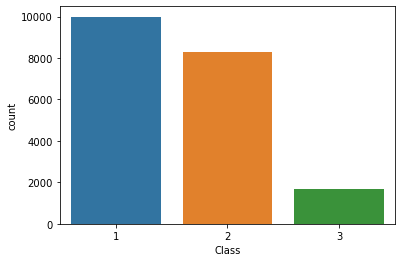

In [15]:
sns.countplot(df['Class'])

from above observation it is clear that GALAXY are in high quantity in the space

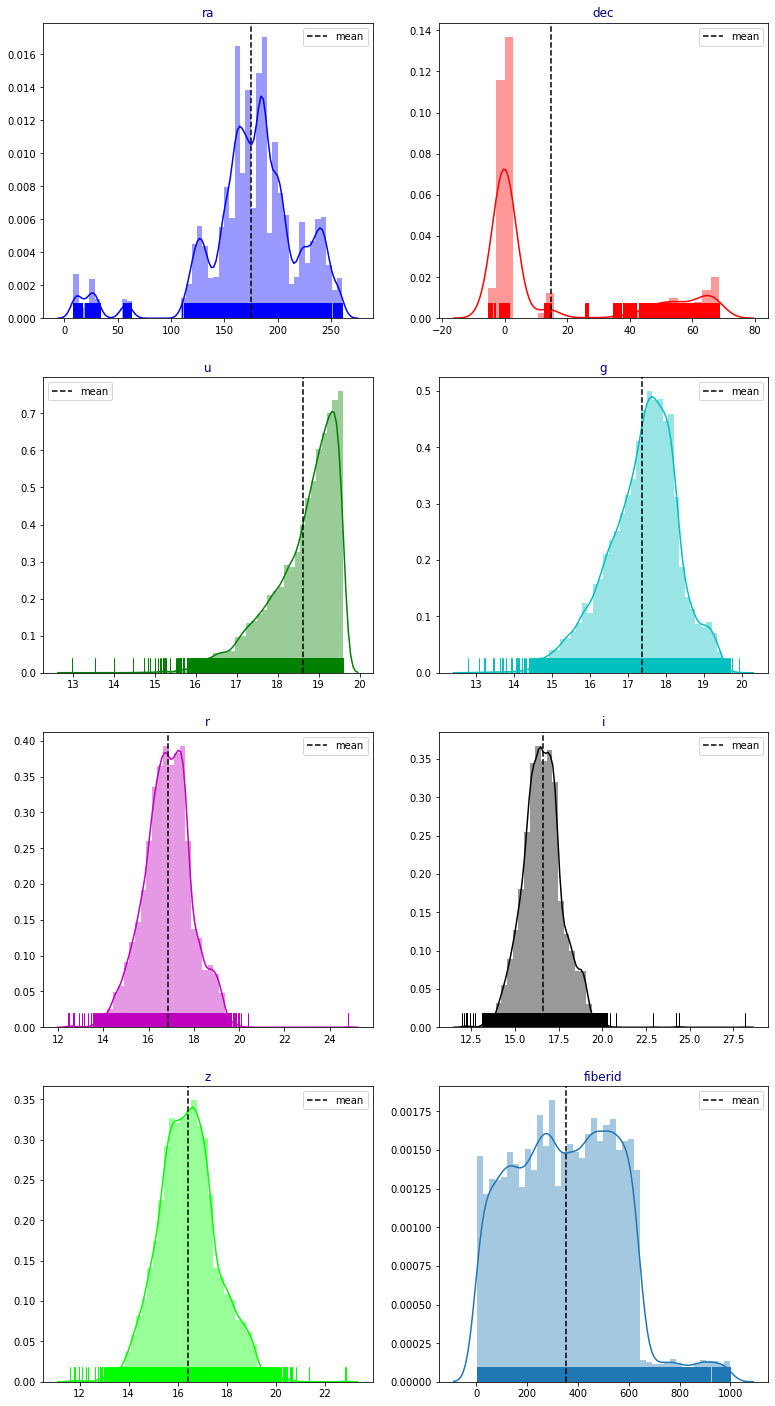

In [16]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

cols=['ra', 'dec', 'u', 'g', 'r', 'i', 'z','fiberid'] 
length= len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax=sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

from above observation it is clear that some columns have normalized data but some hava abnormal data

# correlation matrix

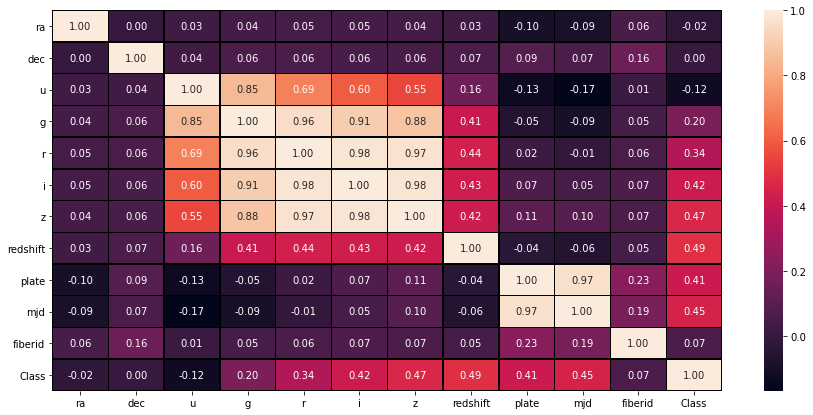

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7)) 
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f') 

variables which have high postive correlation with target variable(Class)

1.g =0.20

2.r =0.34

3.i =0.42

4.z =0.47

5.redshift =0.49

6.plate =0.41

7.mjd =0.45

column u has negative correlation with target variable

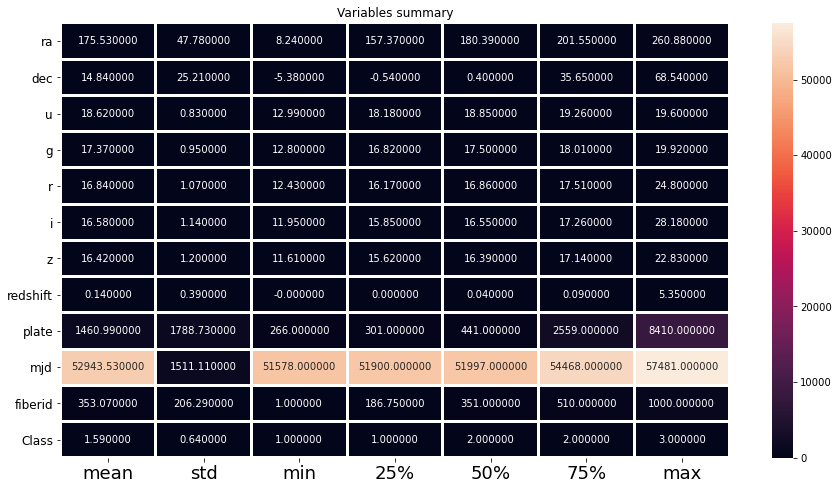

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [19]:
df['z'].max()

22.83306

u band minmum value is 12.98897 and max value is 19.5999

g band minmum value is 12.79955 and max value is 19.91897

r band minmum value is 12.4316 and max value is 24.8020

i band minmum value is 11.94721 and max value is 28.17963

z band minmum value is 11.61041 and max value is 22.83306

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C31E00CB50>,
      dtype=object)

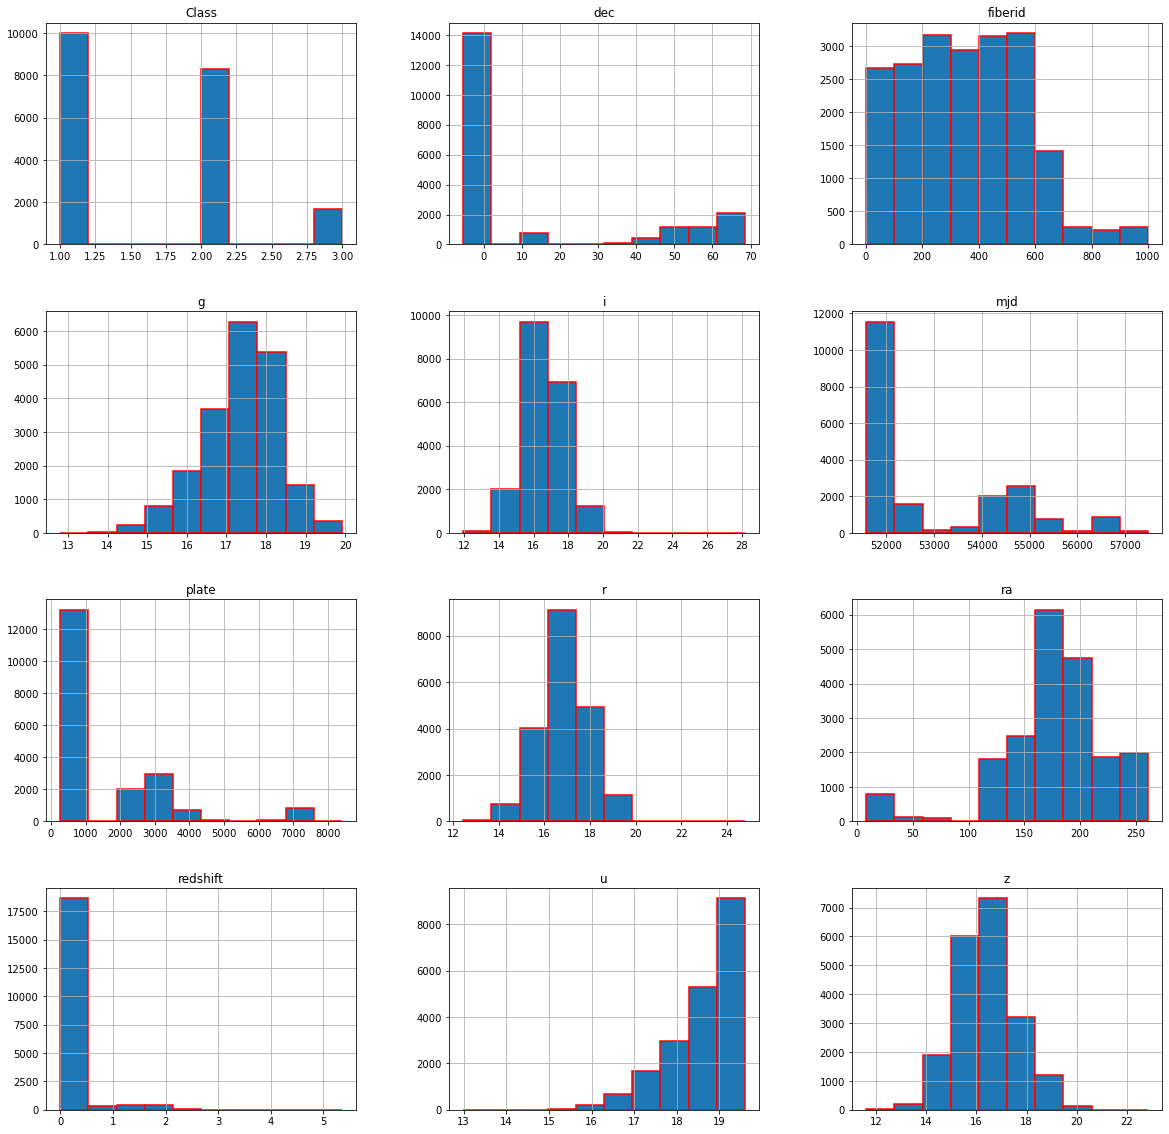

In [20]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

from above observation it is clear that data is not normalized

# check outliers

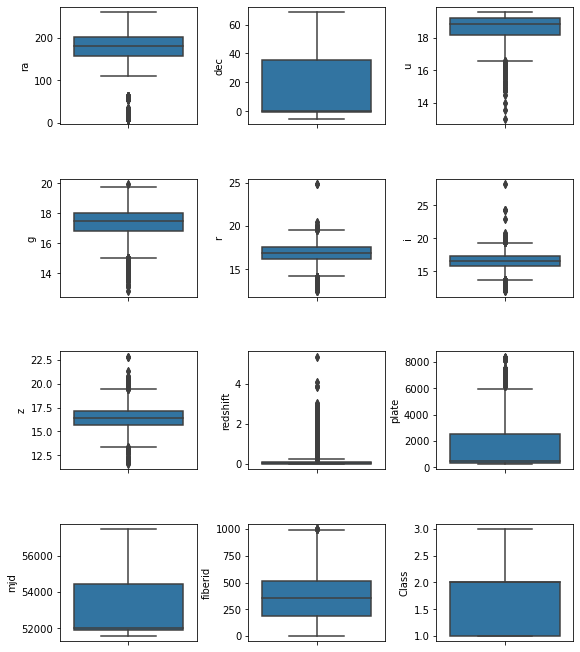

In [21]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(8,9))
index=0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

most of columns have outliers so we will remove them

# removing outliers

In [22]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   45,   109,   129, ..., 19992, 19994, 19997], dtype=int64),
 array([7, 7, 7, ..., 8, 8, 8], dtype=int64))

In [23]:
df_new=df[(z<3).all(axis=1)]
df_new

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid,Class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491,2
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541,2
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510,2
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,0.055515,447,51877,249,1
19995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,0.027583,447,51877,246,1
19996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,0.117772,447,51877,228,1
19998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,0.014019,447,51877,229,1


# percentage loss of data while removing outliers:

In [24]:
percentage_loss=((20000-17396)/20000)*100
print(percentage_loss)

13.020000000000001


if we go to without outliers data then we will lose 13.02 % data and this is not good idea so we will go with outliers

# one hot encoding

In [25]:
df =pd.get_dummies(df,columns=['Class'])
df.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid,Class_1,Class_2,Class_3
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491,0,1,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541,0,1,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513,1,0,0
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510,0,1,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512,0,1,0


# input split¶

In [26]:
X=df_new.drop(columns=['Class'],axis=1)
y=df_new['Class']

# spliting the data

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# model training

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def validation_predictions(model, name):
    new_model = model.fit(X_train, y_train)
    pred = np.exp(new_model.predict(X_test))
    print("Accuracy: %f" %(r2_score(np.exp(y_test), pred)))
    print("RMSE: %f" %(np.sqrt(mean_squared_error(np.exp(y_test), pred))))
    print("MAE: %f" %(mean_absolute_error(np.exp(y_test), pred)))

In [32]:
lr_model = LinearRegression()
validation_predictions(lr_model, 'Linear Regression')

Accuracy: 0.448223
RMSE: 2.977057
MAE: 1.494626


In [40]:
dt_model = DecisionTreeRegressor(random_state=0)
validation_predictions(dt_model, 'Decision Tree Regressor')

Accuracy: 0.956832
RMSE: 0.832696
MAE: 0.039925


In [42]:
rf_model = RandomForestRegressor(random_state=0)
validation_predictions(rf_model, 'Random Forest Regressor')

Accuracy: 0.943509
RMSE: 0.952568
MAE: 0.123661


In [44]:
from sklearn.ensemble import AdaBoostRegressor
ar_model = AdaBoostRegressor(random_state=0)
validation_predictions(ar_model, 'AdaBoost Regressor')

Accuracy: 0.775122
RMSE: 1.900546
MAE: 0.780792


# conclusion

In [45]:
model_compare=pd.DataFrame({"model":['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor'],'Accuracy %':[44.82,95.68,94.35,77.51],'RMSE':[2.97,0.83,0.95,1.90]})

In [46]:
model_compare

,model,Accuracy %,RMSE
0,LinearRegression,44.82,2.97
1,DecisionTreeRegressor,95.68,0.83
2,RandomForestRegressor,94.35,0.95
3,AdaBoostRegressor,77.51,1.90


from the above table it is clear that DecisionTreeRegressor is the best model for prediction because it has high accuracy and low RMSE So we would save this model

# Lets see final Actual Vs Predicted sample.

,Y Test,Pred
4802,2,1.817301
1167,1,1.011613
15153,1,1.231799
16745,1,1.130480
9795,2,1.823970


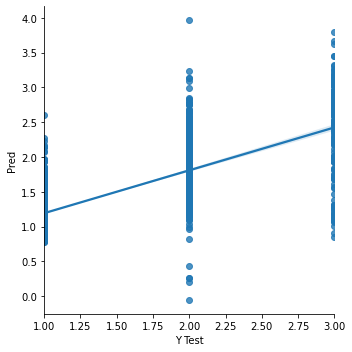

In [47]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Serialization

In [48]:
import joblib
joblib.dump(DecisionTreeRegressor(),"skyserverproject.pkl")

['skyserverproject.pkl']